# Explorative Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (6.4, 4.8)

## Metadata

In [2]:
meta_data = pd.read_csv("metadata.tsv", sep = "\t")
print(f"rows: {meta_data.shape[0]}, columns: {meta_data.shape[1]}")
print()

# Any missing values?
meta_data.isna().sum()

rows: 105360, columns: 12



show_uri                     0
show_name                    0
show_description             2
publisher                    0
language                     0
rss_link                     0
episode_uri                  0
episode_name                 0
episode_description        205
duration                     0
show_filename_prefix         0
episode_filename_prefix      0
dtype: int64

In [3]:
# Number of unique values in each column
print("\033[1m", "Column   Unique values", "\033[0m")
for column in meta_data.columns:
    print(f"{column},    {len(meta_data[column].unique())}")

 Column   Unique values 
show_uri,    18376
show_name,    18290
show_description,    18322
publisher,    17490
language,    20
rss_link,    18376
episode_uri,    105360
episode_name,    103660
episode_description,    100879
duration,    90916
show_filename_prefix,    18376
episode_filename_prefix,    105360


In [4]:
# Languages
print(meta_data.language.unique())

["['en']" "['en-US']" "['en-AU']" "['en-CA']" "['en-GB']" "['en-NZ']"
 "['en-IE']" "['ms']" "['en-PH']" "['ta']" "['en-ZA']" "['id']"
 "['nl-BE']" "['ga']" "['en-JM']" "['hi']" "['ml']" "['en-IN']" "['es']"
 "['pt']"]


Number of unique shows: 18290
Number of unique show descriptions: 18322
Max no episodes of one show: 1072, Min: 1
Numer of shows represented by only one episode: 8632
Numer of shows represented by less than 10 episodes: 16354


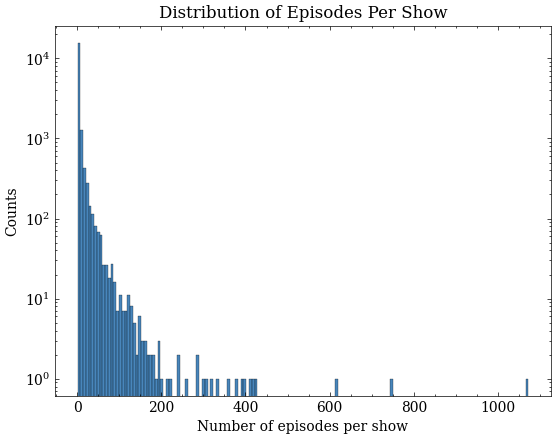

In [5]:
# Number of episodes per show

print(f"Number of unique shows: {len(meta_data.show_name.unique())}")
print(f"Number of unique show descriptions: {len(meta_data.show_description.unique())}")
# 32 rows are not coherent with rest of dataset. Drop?

# Check out episodes per show distribution
ep_per_show = meta_data.groupby(meta_data.show_name)["show_name"].count()
print(f"Max no episodes of one show: {max(ep_per_show.values)}, Min: 1")
one = ep_per_show[ep_per_show == 1]
print(f"Numer of shows represented by only one episode: {len(one)}")
ten = ep_per_show[ep_per_show <= 10]
print(f"Numer of shows represented by less than 10 episodes: {len(ten)}")


ep_per_show = ep_per_show.sort_values(ascending=False)
# ep_per_show.head(20)

# plot dist of episodes represented by less than 200 episodes
two_hundred = ep_per_show[ep_per_show <= 200]

ax = sns.histplot(x = ep_per_show.values, log_scale = (False, True), bins=len(ep_per_show.unique()))
ax.set_xlabel("Number of episodes per show")
ax.set_ylabel("Counts")
ax.set_title("Distribution of Episodes Per Show")
plt.show()

## Transcripts

In [6]:
t_data = pd.read_csv("transcripts_dataset_final.csv.gz")
print(t_data.shape)

(105228, 16)


In [7]:
print(f"avg. confidence: {np.mean(t_data.avg_confidence):.1%}")
print(f"avg. words: {np.mean(t_data.word_count):.2f}")
print(f"Total hours of podcasts: {t_data.duration.sum()/60:.2f}")
print(f"Total number of words: {t_data.word_count.sum()}")

avg. confidence: 83.2%
avg. words: 5731.78
Total hours of podcasts: 59378.80
Total number of words: 603143757


In [8]:
print(f"Episodes with non-english language tags: {105360 - t_data.shape[0]}")
print("Language tags left after filtering:")
t_data.language.value_counts()

Episodes with non-english language tags: 132
Language tags left after filtering:


['en']       79452
['en-US']    20264
['en-GB']     2335
['en-AU']     1377
['en-CA']      962
['en-PH']      368
['en-IE']      243
['en-NZ']      141
['en-ZA']       86
Name: language, dtype: int64

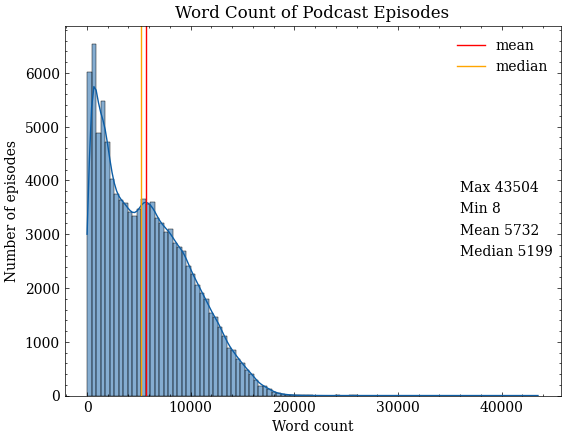

In [9]:
sns.histplot(t_data.word_count, bins = 100, kde = True)
plt.axvline(np.mean(t_data.word_count), color = "r", label = "mean")
plt.axvline(np.median(t_data.word_count), color ="orange", label = "median")
plt.text(36000, 3800, f"Max {max(t_data.word_count)}")
plt.text(36000, 3400, f"Min {min(t_data.word_count)}")
plt.text(36000, 3000, f"Mean {np.mean(t_data.word_count):.0f}")
plt.text(36000, 2600, f"Median {np.median(t_data.word_count):.0f}")
plt.title("Word Count of Podcast Episodes")
plt.xlabel("Word count")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

In [10]:
print(f"There are {len(t_data[t_data.word_count < 50])} podcasts with less than 50 words")
print(f"There are {len(t_data[t_data.word_count < 100])} podcasts with less than 100 words")
print(f"There are {len(t_data[t_data.word_count < 250])} podcasts with less than 250 words")
print(f"There are {len(t_data[t_data.word_count < 1000])} podcasts with less than 1000 words")
print(f"There are {len(t_data[t_data.word_count > 20000])} podcasts with more than 20 000 words")

There are 236 podcasts with less than 50 words
There are 609 podcasts with less than 100 words
There are 2461 podcasts with less than 250 words
There are 14075 podcasts with less than 1000 words
There are 33 podcasts with more than 20 000 words


In [11]:
print(f"On average, {sum(t_data.word_count) / sum(t_data.duration):.2f} words are spoken per minute")

On average, 169.29 words are spoken per minute


In [12]:
print('Average duration: ', np.median(t_data.duration))

Average duration:  31.65670833333333


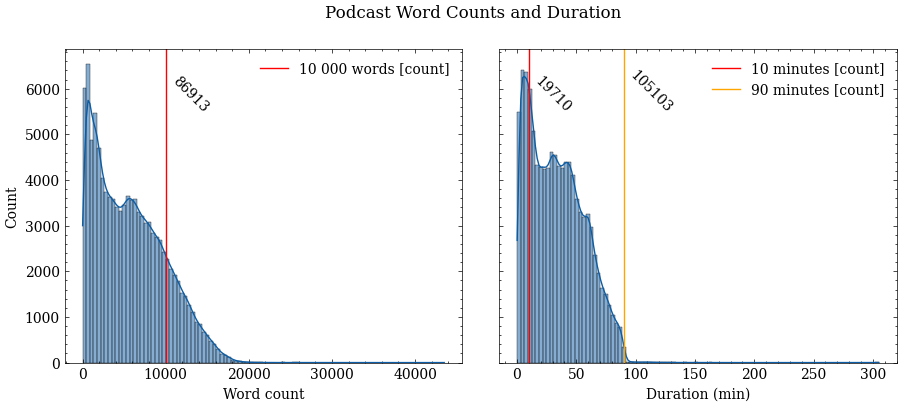

In [13]:
# Calculate label stats for below charts
duration_10 = t_data.groupby(t_data.duration <=10)["duration"].count().values[1]
duration_90 = t_data.groupby(t_data.duration <=90)["duration"].count().values[1]
word_count_10 = t_data.groupby(t_data.word_count <=10000)["word_count"].count().values[1]

# plot
fig, axs = plt.subplots(1,2, figsize=(9, 4), sharey=True)
fig.suptitle("Podcast Word Counts and Duration")
fig.tight_layout()

sns.histplot(t_data.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(t_data.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10 000 words [count]")
axs[0].text(10500, 5500, word_count_10, rotation=-45)
axs[0].set_xlabel("Word count")
axs[1].axvline(10, color= "r", label ="10 minutes [count]")
axs[1].axvline(90, color= "orange", label ="90 minutes [count]")
axs[1].text(13, 5500, duration_10, rotation=-45)
axs[1].text(93, 5500, duration_90, rotation=-45)
axs[1].set_xlabel("Duration (min)")
axs[0].legend()
axs[1].legend()
plt.show()

In [14]:
# Duration stats
print(f"Max duration {max(t_data.duration):.2f}")
print(f"Min duration {min(t_data.duration):.2f}")
print(f"Mean duration {np.mean(t_data.duration):.2f}")
print(f"Median duration {np.median(t_data.duration):.2f}")
print(f"There are {len(t_data[t_data.duration < 1])} podcasts shorter than 1 min")
print(f"There are {len(t_data[t_data.duration < 5])} podcasts shorter than 5 min")
print(f"There are {len(t_data[t_data.duration > 100])} podcasts longer than 100 min")

Max duration 304.95
Min duration 0.18
Mean duration 33.86
Median duration 31.66
There are 741 podcasts shorter than 1 min
There are 9583 podcasts shorter than 5 min
There are 83 podcasts longer than 100 min


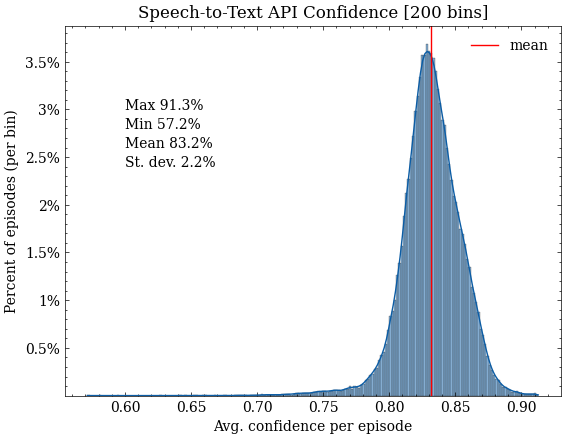

In [42]:
sns.histplot(t_data.avg_confidence, stat='proportion' , kde=True, bins = 200)
plt.axvline(np.mean(t_data.avg_confidence), color = "r", label = "mean")
plt.text(0.6, 0.03, f"Max {max(t_data.avg_confidence):.1%}")
plt.text(0.6, 0.028, f"Min {min(t_data.avg_confidence):.1%}")
plt.text(0.6, 0.026, f"Mean {np.mean(t_data.avg_confidence):.1%}")
plt.text(0.6, 0.024, f"St. dev. {np.std(t_data.avg_confidence):.1%}")
plt.title("Speech-to-Text API Confidence [200 bins]")
plt.yticks([0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035], ['0.5%', '1%', '1.5%', '2%', '2.5%', '3%', '3.5%'])
plt.xlabel("Avg. confidence per episode")
plt.ylabel("Percent of episodes (per bin)")
plt.legend()
plt.show()

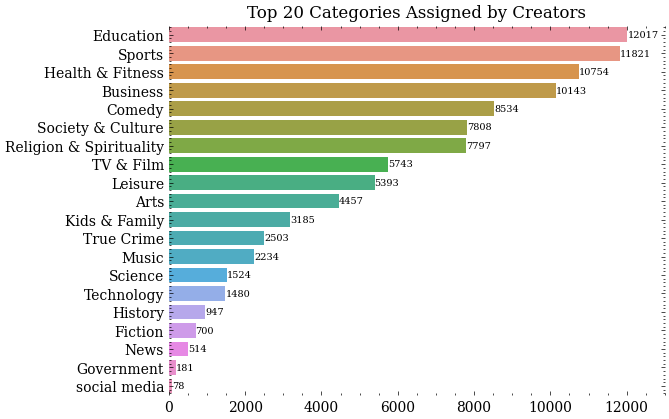

Total number of categories: 129
Number of episodes without category: 5999

Top Categories


Education                    12017
Sports                       11821
Health & Fitness             10754
Business                     10143
Comedy                        8534
Society & Culture             7808
Religion & Spirituality       7797
TV & Film                     5743
Leisure                       5393
Arts                          4457
Kids & Family                 3185
True Crime                    2503
Music                         2234
Science                       1524
Technology                    1480
History                        947
Fiction                        700
News                           514
Government                     181
social media                    78
startups                        75
Football                        73
Business:Entrepreneurship       72
Fitness                         58
Drama                           58
Name: category, dtype: int64

In [16]:
# Visualise creator categories
plt.rcParams.update({'font.size': 10})
top_categories = t_data.category.value_counts().head(20)
ax = sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlim(0,13000)
plt.title("Top 20 Categories Assigned by Creators")
plt.rcParams.update({'font.size': 7})  # decrease font size
ax.bar_label(ax.containers[0])
plt.rcParams.update({'font.size': 10})  # return to normal font size
# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

print(f"Total number of categories: {len(t_data.category.value_counts())}")
print(f"Number of episodes without category: {sum(t_data.category.isna())}")
print()
print("Top Categories")
t_data.category.value_counts().head(25)

In [17]:
print("Bottom Categories")
t_data.category.value_counts().iloc[52:]

Bottom Categories


2023money                                                                           12
IELTS                                                                               12
nikki and steven                                                                    11
itunescategorytextbusinessitunescategorytextmanagementampmarketingitunescategory     9
Language Learning                                                                    9
                                                                                    ..
Entrepreneur                                                                         1
cashflow                                                                             1
844629                                                                               1
Perspective                                                                          1
Roleplaying                                                                          1
Name: category, Length: 77, dtype: int64

## EDA on Education category

In [18]:
edu = pd.read_csv('education_transcripts.csv.gz', compression='gzip')
edu.shape

(12017, 17)

In [19]:
print(f"avg. confidence: {np.mean(edu.avg_confidence):.1%}")
print(f"avg. words: {np.mean(edu.word_count):.2f}")
print(f"Total hours of podcasts: {edu.duration.sum()/60:.2f}")
print(f"Total number of words: {edu.word_count.sum()}")

avg. confidence: 83.7%
avg. words: 3779.72
Total hours of podcasts: 4560.97
Total number of words: 45420914


In [20]:
print(f'Percentage of podcasts episodes in Education category: {len(edu.index)/105360:.1%}')
print(f'Percentage of words in Education category: {edu.word_count.sum()/603143757:.1%}')
print(f'Number of docs if we use embeddings for 265 tokens: {edu.word_count.sum()/256:.0f}')

Percentage of podcasts episodes in Education category: 11.4%
Percentage of words in Education category: 7.5%
Number of docs if we use embeddings for 265 tokens: 177425


In [21]:
print("Language tags left after filtering:")
edu.language.value_counts()

Language tags left after filtering:


['en']       9124
['en-US']    2166
['en-GB']     278
['en-CA']     209
['en-AU']     152
['en-PH']      47
['en-IE']      34
['en-ZA']       4
['en-NZ']       3
Name: language, dtype: int64

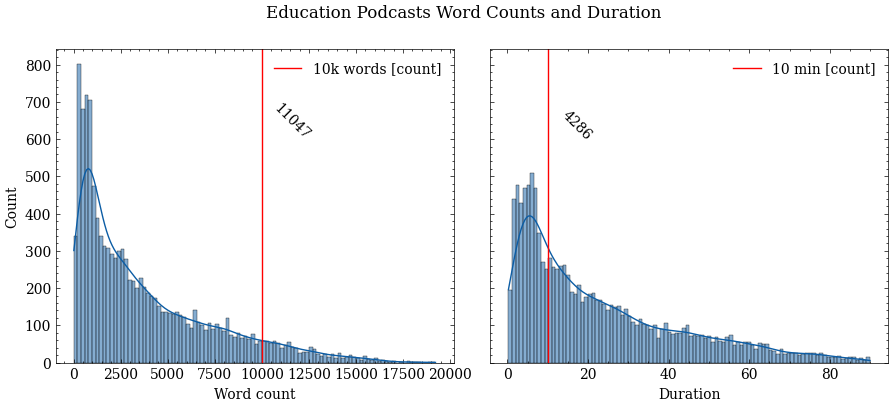

In [44]:
# Calculate label stats for below charts
duration_10 = edu.groupby(edu.duration <=10)["duration"].count().values[1]
word_count_10 = edu.groupby(edu.word_count <=10000)["word_count"].count().values[1]

# plot
fig, axs = plt.subplots(1,2, figsize=(9, 4), sharey=True)
fig.suptitle("Education Podcasts Word Counts and Duration")
fig.tight_layout()

sns.histplot(edu.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(edu.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10k words [count]")
axs[0].text(10500, 600, word_count_10, rotation=-45)
axs[0].set_xlabel("Word count")
axs[1].axvline(10, color= "r", label ="10 min [count]")
# axs[1].axvline(90, color= "orange", label ="90 minutes [count]")
axs[1].text(13, 600, duration_10, rotation=-45)
# axs[1].text(93, 600, duration_90, rotation=-45)
axs[1].set_xlabel("Duration")
axs[0].legend()
axs[1].legend()
plt.show()

## EDA on Sports category

In [23]:
sport = pd.read_csv('sports_transcripts.csv.gz', compression='gzip')
sport.shape

(11821, 17)

In [24]:
print(f'Percentage of podcasts episodes in Sports category: {len(sport.index)/105360:.1%}')
print(f'Percentage of words in Sports category: {sport.word_count.sum()/603143757:.1%}')
print(f'Number of docs if we use embeddings for 265 tokens: {sport.word_count.sum()/256:.0f}')

Percentage of podcasts episodes in Sports category: 11.2%
Percentage of words in Sports category: 15.4%
Number of docs if we use embeddings for 265 tokens: 362931


In [25]:
print(f'Average word count: {np.mean(sport.word_count):.0f}')
print(f'Min word count: {min(sport.word_count):.0f}')
print(f'Max word count: {max(sport.word_count):.0f}')
print(f"There are {len(sport[sport.word_count < 50])} podcasts with less than 50 words")
print(f"There are {len(sport[sport.word_count < 100])} podcasts with less than 100 words")
print(f"There are {len(sport[sport.word_count < 250])} podcasts with less than 250 words")

Average word count: 7860
Min word count: 16
Max word count: 20236
There are 5 podcasts with less than 50 words
There are 19 podcasts with less than 100 words
There are 74 podcasts with less than 250 words


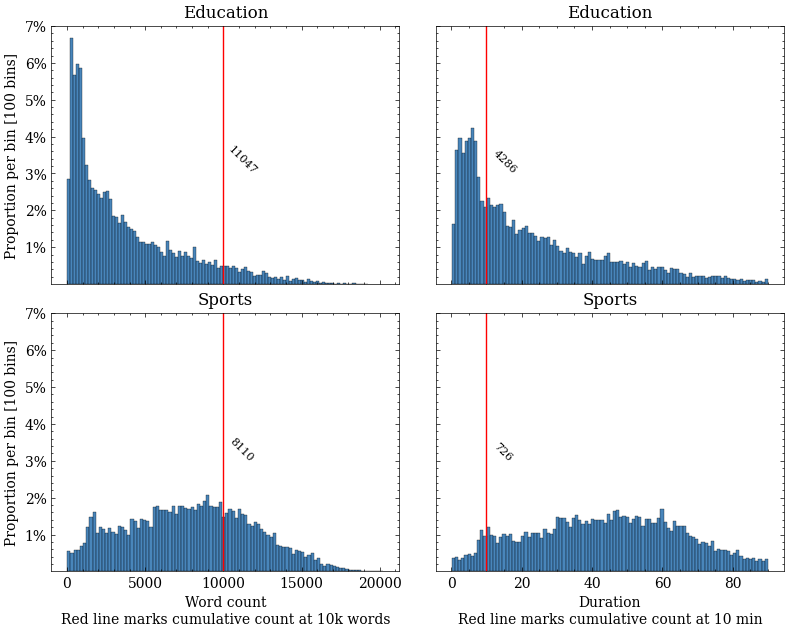

In [51]:
# Calculate label stats for below charts
edu_duration_10 = edu.groupby(edu.duration <=10)["duration"].count().values[1]
edu_word_count_10 = edu.groupby(edu.word_count <=10000)["word_count"].count().values[1]
sport_duration_10 = sport.groupby(sport.duration <=10)["duration"].count().values[1]
sport_word_count_10 = sport.groupby(sport.word_count <=10000)["word_count"].count().values[1]

# plot
fig, axs = plt.subplots(2,2, figsize=(8, 6), sharey=True, sharex='col')
# fig.suptitle("Podcasts Word Counts and Duration")
fig.tight_layout()

sns.histplot(edu.word_count, stat='proportion', bins = 100, ax= axs[0,0])
sns.histplot(edu.duration, stat='proportion', bins = 100, ax= axs[0,1])
axs[0,0].axvline(10000, color= "r")
axs[0,0].text(10200, 0.03, edu_word_count_10, rotation=-45, fontdict={'fontsize': 8})
axs[0,0].set_title("Education")
axs[0,0].set_ylabel("Proportion per bin [100 bins]")
axs[0,0].set_yticks([0.01, 0.02, 0.03,0.04,0.05,0.06,0.07], ['1%', '2%', '3%', '4%', '5%', '6%', '7%'])
axs[0,1].axvline(10, color= "r")
axs[0,1].text(11.5, 0.03, edu_duration_10, rotation=-45, fontdict={'fontsize': 8})
axs[0,1].set_title("Education")

sns.histplot(sport.word_count, stat='proportion', bins = 100, ax= axs[1,0])
sns.histplot(sport.duration, stat='proportion', bins = 100, ax= axs[1,1])
axs[1,0].axvline(10000, color= "r")
axs[1,0].text(10300, 0.03, sport_word_count_10, rotation=-45, fontdict={'fontsize': 8})
axs[1,0].set_xlabel("Word count\nRed line marks cumulative count at 10k words")
axs[1,0].set_title("Sports")
axs[1,0].set_ylabel("Proportion per bin [100 bins]")
axs[1,1].axvline(10, color= "r")
axs[1,1].text(11.5, 0.03, sport_duration_10, rotation=-45, fontdict={'fontsize': 8})
axs[1,1].set_xlabel("Duration\nRed line marks cumulative count at 10 min")
axs[1,1].set_title("Sports")
plt.show()

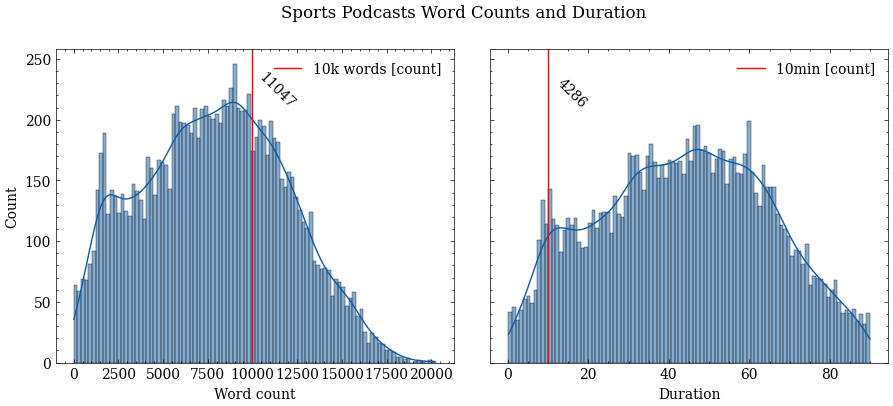

In [27]:
# plot
fig, axs = plt.subplots(1,2, figsize=(9, 4), sharey=True)
fig.suptitle("Sports Podcasts Word Counts and Duration")
fig.tight_layout()

sns.histplot(sport.word_count, bins = 100, kde = True, ax= axs[0])
sns.histplot(sport.duration, bins = 100, kde = True, ax= axs[1])
axs[0].axvline(10000, color= "r", label = "10k words [count]")
axs[0].text(10200, 210, word_count_10, rotation=-45)
axs[0].set_xlabel("Word count")
axs[1].axvline(10, color= "r", label ="10min [count]")
axs[1].text(11.5, 210, duration_10, rotation=-45)
axs[1].set_xlabel("Duration")
axs[0].legend()
axs[1].legend()
plt.show()

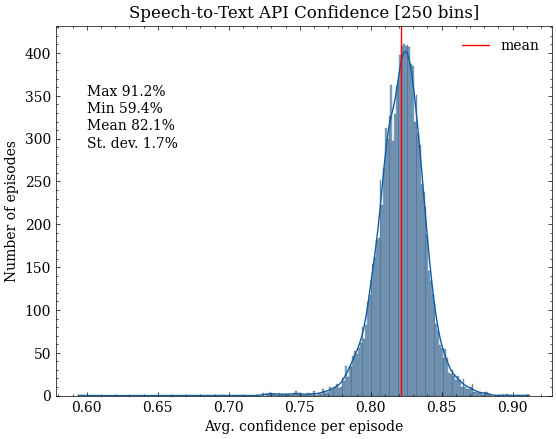

In [28]:
sns.histplot(sport.avg_confidence, kde=True, bins = 250)
plt.axvline(np.mean(sport.avg_confidence), color = "r", label = "mean")
plt.text(0.6, 350, f"Max {max(sport.avg_confidence):.1%}")
plt.text(0.6, 330, f"Min {min(sport.avg_confidence):.1%}")
plt.text(0.6, 310, f"Mean {np.mean(sport.avg_confidence):.1%}")
plt.text(0.6, 290, f"St. dev. {np.std(sport.avg_confidence):.1%}")
plt.title("Speech-to-Text API Confidence [250 bins]")
plt.xlabel("Avg. confidence per episode")
plt.ylabel("Number of episodes")
plt.legend()
plt.show()

In [29]:
sport.language.value_counts()

['en']       8695
['en-US']    2306
['en-CA']     271
['en-AU']     237
['en-GB']     222
['en-PH']      43
['en-NZ']      35
['en-IE']      10
['en-ZA']       2
Name: language, dtype: int64